## Scoping for Part 2:
Owner:  Leana

2.  An update of the estimated number of OY in South King County.  In addition to the estimate, be sure to include a breakdown of the count of OY by Public Use Microdata Area (PUMA) within South King County:

- Main goal:  Get an estimate of the current number of OY in SKC.
- Include a breakdown of this count in regards to the PUMA data.  Think about what this means:
    - Look into what data is included in the PUMA 
    - Decide what should be included in the breakdown, e.g. other demographic information like living expenses, income etc?
    - How do we want to break the data down?  By age group, gender, living situation/circumstance?
    - Are there are any other interpretations of what 'including a breakdown of the count by PUMA within SKC' means?


In [123]:
# Imports:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Establish DB:
DBNAME = "opportunity_youth"

# Create a connection to db
conn = psycopg2.connect(dbname=DBNAME)

# Example query format:
# pd.read_sql("SELECT * FROM pums_2017 LIMIT 10;", conn)

First, isolate South King County from tables:

In [124]:
south_pums_2017 = pd.read_sql("SELECT agep, region, st FROM pums_2017 WHERE st = '53';", conn)
south_pums_2017.head() # this isn't right.. just experiment

,agep,region,st
0,68.0,4,53
1,66.0,4,53
2,72.0,4,53
3,64.0,4,53
4,52.0,4,53


In [125]:
south_pums_2017['region'].unique
# region = 4 means 'west'.  Here it would be referring to west of the state - not west king county.
# need to find the column that isolates the county...

<bound method Series.unique of 0         4
1         4
2         4
3         4
4         4
         ..
359070    4
359071    4
359072    4
359073    4
359074    4
Name: region, Length: 359075, dtype: object>

In [126]:
puma_names_2010_wa = pd.read_sql("SELECT * FROM puma_names_2010 WHERE state_name = 'Washington';", conn)
puma_names_2010_wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_fips  56 non-null     object
 1   state_name  56 non-null     object
 2   cpuma0010   56 non-null     object
 3   puma        56 non-null     object
 4   geoid       56 non-null     object
 5   gisjoin     56 non-null     object
 6   puma_name   56 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [149]:
#  Show all WA puma names
puma_names_2010_wa

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1030,10100,5310100,G53010100,Whatcom County--Bellingham City ...
1,53,Washington ...,1031,10200,5310200,G53010200,"Skagit, Island & San Juan Counties ..."
2,53,Washington ...,1032,10300,5310300,G53010300,Chelan & Douglas Counties ...
3,53,Washington ...,1032,10400,5310400,G53010400,"Stevens, Okanogan, Pend Oreille & Ferry Counti..."
4,53,Washington ...,1032,10600,5310600,G53010600,"Whitman, Asotin, Adams, Lincoln, Columbia & Ga..."
5,53,Washington ...,1032,10701,5310701,G53010701,"Benton & Franklin Counties--Pasco, Richland (N..."
6,53,Washington ...,1032,10702,5310702,G53010702,Benton County (East Central)--Kennewick & Rich...
7,53,Washington ...,1032,10703,5310703,G53010703,"Walla Walla, Benton (Outer) & Franklin (Outer)..."
8,53,Washington ...,1032,10800,5310800,G53010800,Grant & Kittitas Counties ...
9,53,Washington ...,1033,10501,5310501,G53010501,Spokane County (North Central)--Spokane City (...


In [150]:
# looking at the above cell and now this cell, you can see these pumas are all puma codes for Washington
relevant_ages_pums['puma'].unique()

array(['11505', '10300', '11801', '10100', '10800', '11103', '11802',
       '11603', '10703', '11504', '10901', '11606', '10501', '11608',
       '11200', '11610', '11507', '11102', '10200', '11612', '11616',
       '11613', '11101', '11604', '11900', '10502', '11614', '11705',
       '10504', '11602', '11601', '11611', '11501', '11503', '11703',
       '11706', '11701', '10400', '10600', '10902', '11615', '11506',
       '11000', '10702', '11300', '11609', '11402', '11704', '11104',
       '11401', '10701', '10503', '11607', '11605', '11502', '11702'],
      dtype=object)

In [128]:
# subset just the king county entries
king_county = puma_names_2010_wa[puma_names_2010_wa['puma_name'].str.match('^King County*')== True]
king_county

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
37,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
38,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
39,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...
40,53,Washington ...,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Me..."
41,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
42,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
43,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
44,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
45,53,Washington ...,1044,11616,5311616,G53011616,"King County (Northeast)--Snoqualmie City, Cott..."
46,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."


In [129]:
# Subset king county df to get south king county df using puma codes from king county df:
skc_puma_codes = ['11613', '11614', '11615', '11612']
skc = king_county[king_county['puma'].isin(skc_puma_codes)]


# king_county[king_county['puma_name'].str.contains('South') == True] - this is what I did initially to subset anything with 'south' in it but there was a northern king county suburb with south in it

In [130]:
skc

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
42,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
43,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
44,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
47,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."


In [131]:
# Now we need to find this data in the puma_2017 table:
pums_2017 = pd.read_sql("SELECT * FROM pums_2017 LIMIT 10;", conn)
pums_2017.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000000006,9,01,11606,4,53,1061971,27.0,68.0,...,53.0,24.0,39.0,24.0,7.0,27.0,8.0,46.0,25.0,50.0
1,P,2013000000006,9,02,11606,4,53,1061971,22.0,66.0,...,49.0,21.0,38.0,20.0,7.0,25.0,8.0,41.0,22.0,47.0
2,P,2013000000012,9,01,10100,4,53,1061971,22.0,72.0,...,24.0,22.0,25.0,7.0,21.0,35.0,6.0,22.0,6.0,37.0
3,P,2013000000012,9,02,10100,4,53,1061971,19.0,64.0,...,21.0,18.0,19.0,7.0,17.0,29.0,6.0,19.0,6.0,29.0
4,P,2013000000038,9,01,11505,4,53,1061971,4.0,52.0,...,4.0,1.0,2.0,8.0,8.0,1.0,4.0,6.0,1.0,4.0


Columns we need for this task:
- rt (Record type - H = Housing record or group quarters Unit.  P = Person record)
- serialno (Housing unit/GQ person serial number - unique)
- puma
- agep
- esr (Employment status recode - e.g. 3 = Unemployed, 6 = Not in labor force)
- sch (School enrollment - e.g. 1 = not attended in last 3 months, 2 = public, 3 = private)
- schg (Grade level attending)
- schl (Educational attainment)
- nwab (Temporary absence from work)
- nwav (Available for work)
- nwla (On layoff from work)
- nwlk (Looking for work)
- sex

So!

In [166]:
### ADD SEX COLUMN
QUERY = """
SELECT rt, serialno, agep, sex, st, puma, sch, schg, schl, esr, nwab, nwav, nwla, nwlk
FROM pums_2017

"""
# WHERE agep BETWEEN 16 AND 24
relevant_ages_pums = pd.read_sql(QUERY, conn)

In [167]:
relevant_ages_pums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359075 entries, 0 to 359074
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rt        359075 non-null  object 
 1   serialno  359075 non-null  object 
 2   agep      359075 non-null  float64
 3   sex       359075 non-null  object 
 4   st        359075 non-null  object 
 5   puma      359075 non-null  object 
 6   sch       347443 non-null  object 
 7   schg      82911 non-null   object 
 8   schl      347443 non-null  object 
 9   esr       291865 non-null  object 
 10  nwab      291865 non-null  object 
 11  nwav      291865 non-null  object 
 12  nwla      291865 non-null  object 
 13  nwlk      291865 non-null  object 
dtypes: float64(1), object(13)
memory usage: 38.4+ MB


In [144]:
relevant_ages_pums['puma'].unique()

array(['11505', '10300', '11801', '10100', '10800', '11103', '11802',
       '11603', '10703', '11504', '10901', '11606', '10501', '11608',
       '11200', '11610', '11507', '11102', '10200', '11612', '11616',
       '11613', '11101', '11604', '11900', '10502', '11614', '11705',
       '10504', '11602', '11601', '11611', '11501', '11503', '11703',
       '11706', '11701', '10400', '10600', '10902', '11615', '11506',
       '11000', '10702', '11300', '11609', '11402', '11704', '11104',
       '11401', '10701', '10503', '11607', '11605', '11502', '11702'],
      dtype=object)

In [151]:
# Now isolate skc rows:
skc_pums = relevant_ages_pums[relevant_ages_pums['puma'].isin(skc_puma_codes)]
skc_pums

,rt,serialno,agep,sex,st,puma,sch,schg,schl,esr,nwab,nwav,nwla,nwlk
32,P,2013000007063,19.0,1,53,11612,2,15,18,6,2,5,2,2
36,P,2013000008046,17.0,2,53,11613,2,13,13,6,2,5,2,2
48,P,2013000011255,17.0,2,53,11614,2,11,12,6,2,5,2,2
54,P,2013000012970,21.0,2,53,11612,3,15,18,6,2,5,2,2
57,P,2013000013525,18.0,2,53,11613,2,14,15,6,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37134,P,2017001386502,18.0,1,53,11613,1,None,11,6,3,5,3,3
37684,P,2017001464049,21.0,2,53,11613,1,None,16,6,3,5,3,3
37718,P,2017001470135,23.0,1,53,11613,1,None,14,6,3,5,3,3
38050,P,2017001518359,18.0,1,53,11613,1,None,11,6,3,5,3,3


In [152]:
skc_pums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 32 to 38130
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rt        2359 non-null   object 
 1   serialno  2359 non-null   object 
 2   agep      2359 non-null   float64
 3   sex       2359 non-null   object 
 4   st        2359 non-null   object 
 5   puma      2359 non-null   object 
 6   sch       2359 non-null   object 
 7   schg      1384 non-null   object 
 8   schl      2359 non-null   object 
 9   esr       2359 non-null   object 
 10  nwab      2359 non-null   object 
 11  nwav      2359 non-null   object 
 12  nwla      2359 non-null   object 
 13  nwlk      2359 non-null   object 
dtypes: float64(1), object(13)
memory usage: 276.4+ KB


In [153]:
# Check ages are correct ages:
skc_pums['agep'].unique()

array([19., 17., 21., 18., 20., 16., 24., 22., 23.])

In [154]:
# Check location is correct:
skc_puma_codes = np.array(skc_puma_codes)

In [155]:
skc_pums['puma'].unique()

array(['11612', '11613', '11614', '11615'], dtype=object)

In [156]:
skc_puma_codes

array(['11613', '11614', '11615', '11612'], dtype='<U5')

#### To summarise so far:  There are 2359 individuals aged between 16-24 in South King County.  
Now we need to isolate which of these are categorised as 'opportunity youth' based on their schooling and employment.  
First, let's make the column names more helpful:

In [157]:
rename_columns = {'rt': 'record_type', 'serialno': 'id', 'puma': 'puma', 'agep': 'age', 'sex': 'sex', 'esr': 'employment_status', 
                  'sch': 'school_enrollment', 'schg': 'grade_attend', 'schl': 'education_attained', 'nwab': 'absent_from_work', 
                  'nwav': 'avail_for_work', 'nwla': 'layoff', 'nwlk': 'look_for_work'}

In [158]:
skc_pums.rename(columns = rename_columns, inplace = True)

/opt/anaconda3/envs/oy-env/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [159]:
# df of all individuals aged between 16-24 in South King County with updated column names
skc_pums

,record_type,id,age,sex,st,puma,school_enrollment,grade_attend,education_attained,employment_status,absent_from_work,avail_for_work,layoff,look_for_work
32,P,2013000007063,19.0,1,53,11612,2,15,18,6,2,5,2,2
36,P,2013000008046,17.0,2,53,11613,2,13,13,6,2,5,2,2
48,P,2013000011255,17.0,2,53,11614,2,11,12,6,2,5,2,2
54,P,2013000012970,21.0,2,53,11612,3,15,18,6,2,5,2,2
57,P,2013000013525,18.0,2,53,11613,2,14,15,6,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37134,P,2017001386502,18.0,1,53,11613,1,None,11,6,3,5,3,3
37684,P,2017001464049,21.0,2,53,11613,1,None,16,6,3,5,3,3
37718,P,2017001470135,23.0,1,53,11613,1,None,14,6,3,5,3,3
38050,P,2017001518359,18.0,1,53,11613,1,None,11,6,3,5,3,3


#### Values for each column:
- rt/record_type (str):
    - H = Housing record or group quarters Unit. 
    - P = Person record
- serialno/id (str):
    - Housing unit/GQ person serial number - unique identifyer
- puma (str):
    - Public use microdata area code (PUMA) based on 2010 Census definition (areas with population of 100,000 or more, use with ST for unique code)
    - 00100..70301 Public use microdata area codes
- agep/age (float):
    - 0 = under 1 year
    - 1.0 - 99.0
- sex (str):
    - 1 = Male
    - 2 = Female
- esr/employment_status (str):
    - Employment status recode
    - b = N/A (less than 16 years old)
    - 1 = Civilian employed, at work
    - 2 = Civilian employed, with a job but not at work
    - 3 = Unemployed
    - 4 = Armed forces, at work
    - 5 = Armed forces, with a job but not at work
    - 6 = Not in labor force   
- sch/school_enrollment (str):
    - School enrollment
    - b = N/A (less than 3 years old)
    - 1 = No, has not attended in the last 3 months
    - 2 = Yes, public school or public college
    - 3 = Yes, private school, private college, or home school   
- schg/grade_attend (str):
    - Grade level attending
    - bb = N/A (not attending school)
    - 01 = Nursery school/preschool
    - 02 = Kindergarten
    - 03 = Grade 1
    - 04 = Grade 2
    - 05 = Grade 3
    - 06 = Grade 4
    - 07 = Grade 5
    - 08 = Grade 6
    - 09 = Grade 7
    - 10 = Grade 8
    - 11 = Grade 9
    - 12 = Grade 10
    - 13 = Grade 11
    - 14 = Grade 12
    - 15 = College undergraduate years (freshman to senior)
    - 16 = Graduate or professional school beyond a bachelor's degree
- schl/education_attained (str): 
    - Educational attainment
    - bb = N/A (less than 3 years old)
    - 01 = No schooling completed
    - 02 = Nursery school, preschool
    - 03 = Kindergarten
    - 04 = Grade 1
    - 05 = Grade 2
    - 06 = Grade 3
    - 07 = Grade 4
    - 08 = Grade 5
    - 09 = Grade 6
    - 10 = Grade 7
    - 11 = Grade 8
    - 12 = Grade 9
    - 13 = Grade 10
    - 14 = Grade 11
    - 15 = 12th grade - no diploma
    - 16 = Regular high school diploma
    - 17 = GED or alternative credential
    - 18 = Some college, but less than 1 year
    - 19 = 1 or more years of college credit, no degree
    - 20 = Associate's degree
    - 21 = Bachelor's degree
    - 22 = Master's degree
    - 23 = Professional degree beyond a bachelor's degree
    - 24 = Doctorate degree
- nwab/absent_from_work (str):
    - Temporary absence from work - See "Employment Status Recode" (ESR)
    - b = N/A (less than 16 years old/at work/on layoff)
    - 1 = Yes
    - 2 = No
    - 3 = Did not report
- nwav/avail_for_work (str): 
    - Available for work - See "Employment Status Recode" (ESR)
    - b = N/A (less than 16 years/at work/not looking)
    - 1 = Yes
    - 2 = No, temporarily ill
    - 3 = No, other reasons
    - 4 = No, unspecified
    - 5 = Did not report
- nwla/layoff (str):
    - On layoff from work   - See "Employment Status Recode" (ESR)
    - b = N/A (less than 16 years old/at work)
    - 1 = Yes
    - 2 = No
    - 3 = Did not report
- nwlk/look_for_work (str):
    - Looking for work - See "Employment Status Recode" (ESR)
    - b = N/A (less than 16 years old/at work/temporarily absent/informed of recall)
    - 1 = Yes
    - 2 = No
    - 3 = Did not report

#### Next, isolate from that table, the OY that are unemployed AND not in school:

So, you'll need columns for employment and school status - look this up.

Let's think about which codes are relevant to display unemployment and out-of-school to define the OY:

In [160]:
oy_employment_status = ['3', '6']
oy_school_enrollment = ['1']
oy_grade_attend = ['bb']

In [165]:
oy_skc_pums = skc_pums[skc_pums['employment_status'].isin(oy_employment_status) & skc_pums['school_enrollment'].isin(oy_school_enrollment)]
oy_skc_pums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 225 to 38050
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   record_type         270 non-null    object 
 1   id                  270 non-null    object 
 2   age                 270 non-null    float64
 3   sex                 270 non-null    object 
 4   st                  270 non-null    object 
 5   puma                270 non-null    object 
 6   school_enrollment   270 non-null    object 
 7   grade_attend        0 non-null      object 
 8   education_attained  270 non-null    object 
 9   employment_status   270 non-null    object 
 10  absent_from_work    270 non-null    object 
 11  avail_for_work      270 non-null    object 
 12  layoff              270 non-null    object 
 13  look_for_work       270 non-null    object 
dtypes: float64(1), object(13)
memory usage: 31.6+ KB


In [162]:
# Since grade_attend column is all null, we'll drop this column
oy_skc_pums.drop(columns='grade_attend', inplace = True)

/opt/anaconda3/envs/oy-env/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [163]:
# See grade_attend dropped:
oy_skc_pums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 225 to 38050
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   record_type         270 non-null    object 
 1   id                  270 non-null    object 
 2   age                 270 non-null    float64
 3   sex                 270 non-null    object 
 4   st                  270 non-null    object 
 5   puma                270 non-null    object 
 6   school_enrollment   270 non-null    object 
 7   education_attained  270 non-null    object 
 8   employment_status   270 non-null    object 
 9   absent_from_work    270 non-null    object 
 10  avail_for_work      270 non-null    object 
 11  layoff              270 non-null    object 
 12  look_for_work       270 non-null    object 
dtypes: float64(1), object(12)
memory usage: 29.5+ KB


In [164]:
# Preview our new dataframe of South King County OY:
oy_skc_pums.head()

,record_type,id,age,sex,st,puma,school_enrollment,education_attained,employment_status,absent_from_work,avail_for_work,layoff,look_for_work
225,P,2013000047506,20.0,2,53,11615,1,16,6,2,5,2,2
234,P,2013000048962,22.0,2,53,11612,1,19,6,2,5,2,2
288,P,2013000058010,17.0,2,53,11614,1,13,6,2,5,2,2
327,P,2013000067168,24.0,2,53,11615,1,18,3,3,5,3,3
354,P,2013000070516,19.0,2,53,11612,1,16,6,2,5,2,2


#### Count the TOTAL number of OY from the last table:
From `df.info()` we can see that we have 270 entries - this means the most updated estimate of the number of Opportunity Youth in South King County is 270 people.  

#### Let's break this count down into individual ages:

In [118]:
oy_age_breakdown = oy_skc_pums.groupby(['age']).count()
oy_age_breakdown

,record_type,id,puma,school_enrollment,education_attained,employment_status,absent_from_work,avail_for_work,layoff,look_for_work
age,,,,,,,,,,
16.0,13,13,13,13,13,13,13,13,13,13
17.0,9,9,9,9,9,9,9,9,9,9
18.0,20,20,20,20,20,20,20,20,20,20
19.0,36,36,36,36,36,36,36,36,36,36
20.0,38,38,38,38,38,38,38,38,38,38
21.0,28,28,28,28,28,28,28,28,28,28
22.0,44,44,44,44,44,44,44,44,44,44
23.0,41,41,41,41,41,41,41,41,41,41
24.0,41,41,41,41,41,41,41,41,41,41


We can see from this table that the opportunity youth in South King County age break down is as follows:

In [121]:
oy_age_breakdown.plot.bar(x='age', y='id')

# ax = df.plot.bar(x='lab', y='val', rot=0)

KeyError: 'age'

Then think about if I need/want any more demographic information to break down by:

Data references:

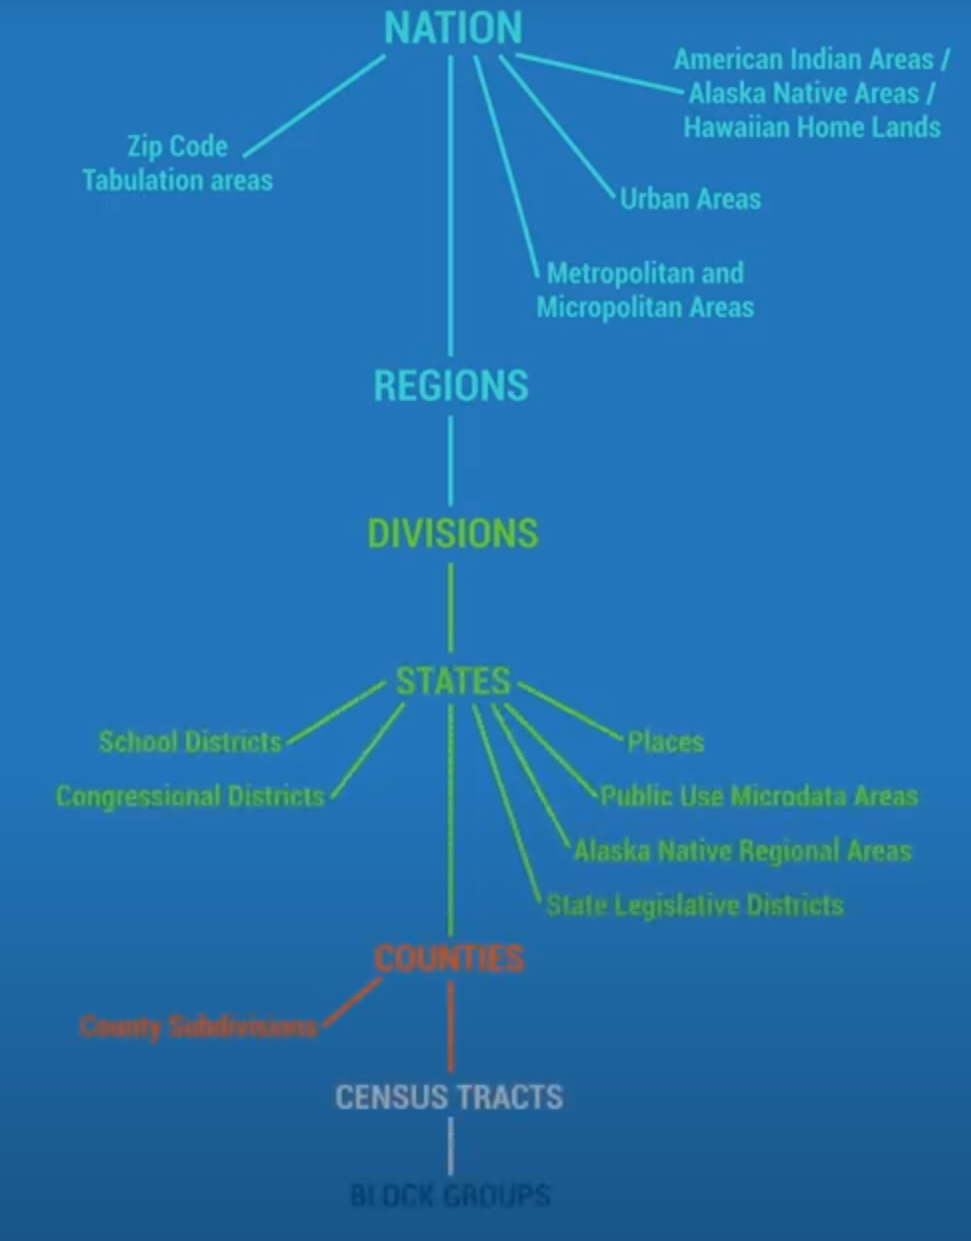